#                   ASSIGNMENT ON PREPROCESSING

import the libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [122]:
data = pd.read_csv('D:/ICT/titanic_dataset.csv')

In [123]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# To set passengerid as index column

In [124]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# To check the basic details 

In [125]:
data.shape

(891, 11)

In [126]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [128]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill the missing values..

In [129]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [130]:
num = data.median().index
num

C:\Users\91989\AppData\Local\Temp\ipykernel_8060\3451372947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num = data.median().index


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [131]:
cat = [ i for i in data.columns if i not in num]
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [132]:
print(data.skew())

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64


C:\Users\91989\AppData\Local\Temp\ipykernel_8060\3844816901.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.skew())


In [133]:
for i in cat:
    data[i].fillna(data[i].value_counts().index[0],inplace=True)
for i in num:
    data[i].fillna(data[i].median(),inplace=True)

In [134]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [135]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Check and handle outliers

# Check and handiling the outliers

To check the outliers in age and handling it

Text(0.5, 1.0, 'boxplot for Age')

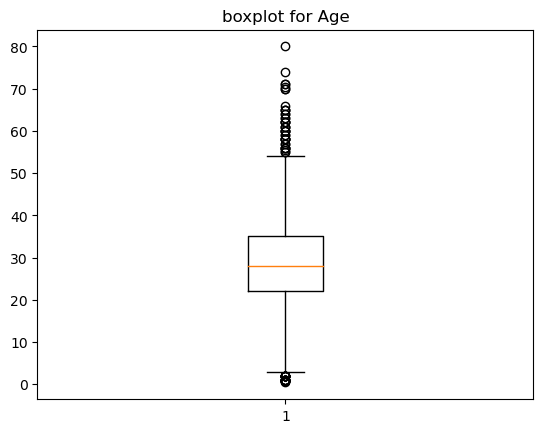

In [136]:
plt.boxplot(data['Age'])
plt.title('boxplot for Age')

In [137]:
Q1= np.percentile(data['Age'],25)

In [138]:
Q1

22.0

In [139]:
Q3= np.percentile(data['Age'],75)

In [140]:
Q3

35.0

In [141]:
IQR= Q3-Q1

In [142]:
IQR

13.0

In [143]:
low_limit = Q1-1.5*IQR
upr_limit = Q3+1.5*IQR

In [144]:
low_limit

2.5

In [145]:
upr_limit

54.5

In [146]:
outlier=[]
for x in data['Age']:
     if((x>upr_limit)or(x<low_limit)):
        outlier.append(x)

In [147]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [148]:
ind = data['Age']>upr_limit
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [149]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace= True)

In [150]:
data.shape

(849, 11)

To check the outliers in FARE

C:\Users\91989\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'boxplot for Fare')

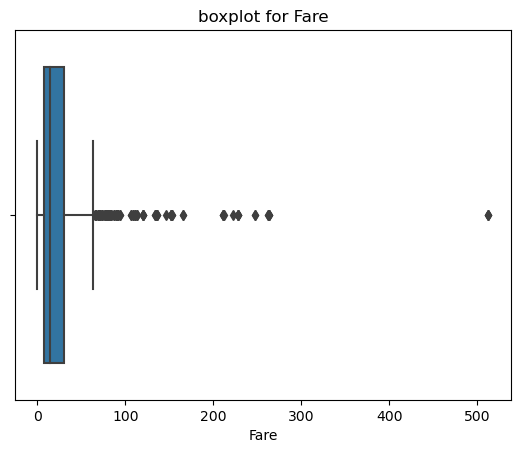

In [151]:
sns.boxplot(data['Fare'],data=data)
plt.title('boxplot for Fare')

<AxesSubplot:>

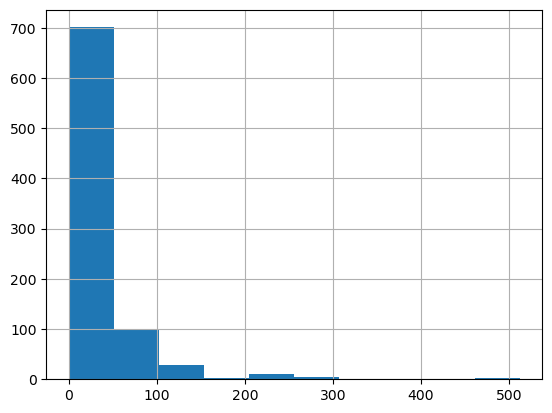

In [152]:
data['Fare'].hist()

In [153]:

print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Fare:  4.921381126490476


In [154]:
Q1=data['Fare'].quantile(0.25)
Q1=data['Fare'].quantile(0.75)
IQR=Q3-Q1

In [155]:
IQR

4.5

In [156]:
low_limit = Q1-1.5*IQR
upr_limit = Q3+1.5*IQR

In [157]:
fare_mean = data['Fare'].mean()
fare_std = data['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = data[(data['Fare'] < low) | (data['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [158]:

data['Fare']=np.where(data['Fare']>upr_limit,upr_limit,np.where(data['Fare']<low_limit,low_limit,data['Fare']))

In [159]:
data.shape

(849, 11)

C:\Users\91989\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

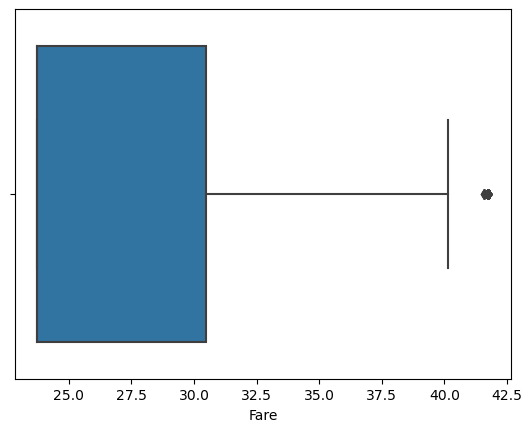

In [160]:
sns.boxplot(data['Fare'],data = data)

To check outliers in sibsp

<AxesSubplot:>

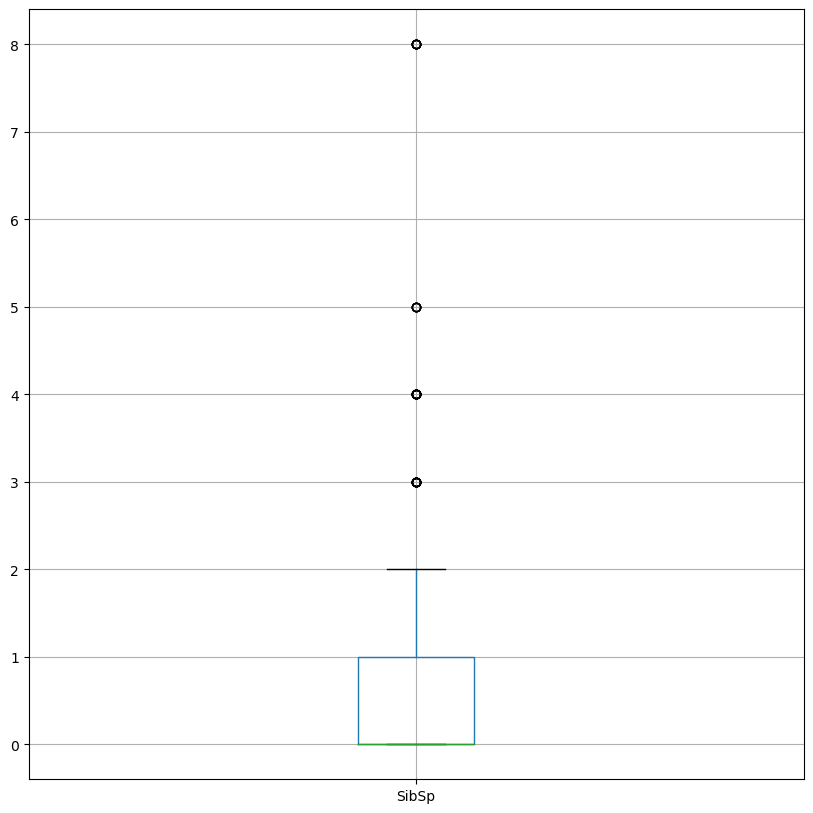

In [161]:
data.boxplot(column='SibSp',figsize=(10,10))

In [162]:
Q1= np.percentile(data['SibSp'],25)

In [163]:
Q1

0.0

In [164]:
Q3= np.percentile(data['SibSp'],75)

In [165]:
Q3

1.0

In [166]:
IQR=Q3-Q1

In [167]:
IQR

1.0

In [168]:
low_limit = Q1-1.5*IQR
upr_limit = Q3+1.5*IQR

In [169]:
outlier=[]
for x in data['SibSp']:
     if((x>upr_limit)or(x<low_limit)):
        outlier.append(x)

In [170]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [171]:
ind = data['SibSp']>upr_limit
data.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [172]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x168416f8730>,
 'caps': [<matplotlib.lines.Line2D at 0x168416f8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168416f8460>],
 'medians': [<matplotlib.lines.Line2D at 0x16841774250>],
 'fliers': [<matplotlib.lines.Line2D at 0x16841774520>],
 'means': []}

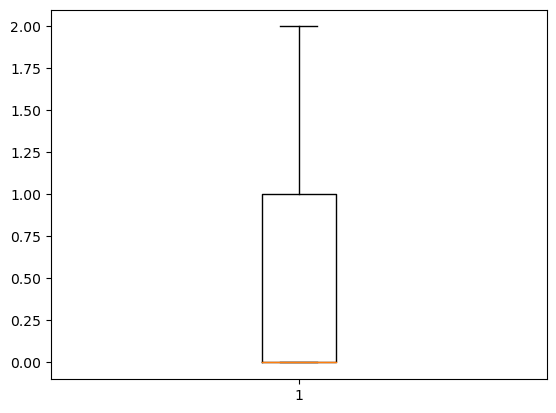

In [173]:
plt.boxplot(data['SibSp'])

In [174]:
data.shape

(803, 11)

# min max scailing on feature set taking target as survived

In [175]:
x = data.drop('Survived',axis = 1)

In [176]:
y = data['Survived']

In [177]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,23.75,B96 B98,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,41.75,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,23.75,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,41.75,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,23.75,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,23.75,B96 B98,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.75,B96 B98,S


In [178]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 803, dtype: int64

In [179]:
x = x.drop(['Name','Ticket'],axis = 1)

In [180]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,23.75,B96 B98,S
2,1,female,38.0,1,0,41.75,C85,C
3,3,female,26.0,0,0,23.75,B96 B98,S
4,1,female,35.0,1,0,41.75,C123,S
5,3,male,35.0,0,0,23.75,B96 B98,S
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,23.75,B96 B98,S
888,1,female,19.0,0,0,30.00,B42,S
889,3,female,28.0,1,2,23.75,B96 B98,S


In [181]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    803 non-null    int64  
 1   Sex       803 non-null    object 
 2   Age       803 non-null    float64
 3   SibSp     803 non-null    int64  
 4   Parch     803 non-null    int64  
 5   Fare      803 non-null    float64
 6   Cabin     803 non-null    object 
 7   Embarked  803 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 56.5+ KB


In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])

In [183]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Cabin'] = label_encoder.fit_transform(x['Cabin'])

In [184]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Embarked'] = label_encoder.fit_transform(x['Embarked'])

In [185]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,1,22.0,1,0,23.75,38,2
2,1,0,38.0,1,0,41.75,68,0
3,3,0,26.0,0,0,23.75,38,2
4,1,0,35.0,1,0,41.75,45,2
5,3,1,35.0,0,0,23.75,38,2
...,...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,23.75,38,2
888,1,0,19.0,0,0,30.00,22,2
889,3,0,28.0,1,2,23.75,38,2


In [186]:
x1 = x.drop(['Cabin','Embarked','Sex'],axis = 1)

In [187]:
x1

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,23.75
2,1,38.0,1,0,41.75
3,3,26.0,0,0,23.75
4,1,35.0,1,0,41.75
5,3,35.0,0,0,23.75
...,...,...,...,...,...
887,2,27.0,0,0,23.75
888,1,19.0,0,0,30.00
889,3,28.0,1,2,23.75


In [188]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
x1 = min_max.fit_transform(x1)

In [189]:
x1

array([[1.        , 0.40276222, 0.5       , 0.        , 0.        ],
       [0.        , 0.70138111, 0.5       , 0.        , 1.        ],
       [1.        , 0.47741695, 0.        , 0.        , 0.        ],
       ...,
       [1.        , 0.51474431, 0.5       , 0.33333333, 0.        ],
       [0.        , 0.47741695, 0.        , 0.        , 0.34722222],
       [1.        , 0.58939903, 0.        , 0.        , 0.        ]])

In [190]:
x1 = pd.DataFrame(x1)

In [191]:
type(x1)

pandas.core.frame.DataFrame

In [192]:
x1

,0,1,2,3,4
0,1.0,0.402762,0.5,0.000000,0.000000
1,0.0,0.701381,0.5,0.000000,1.000000
2,1.0,0.477417,0.0,0.000000,0.000000
3,0.0,0.645390,0.5,0.000000,1.000000
4,1.0,0.645390,0.0,0.000000,0.000000
...,...,...,...,...,...
798,0.5,0.496081,0.0,0.000000,0.000000
799,0.0,0.346771,0.0,0.000000,0.347222
800,1.0,0.514744,0.5,0.333333,0.000000
801,0.0,0.477417,0.0,0.000000,0.347222


In [193]:
x1.describe()

,0,1,2,3,4
count,803.000000,803.000000,803.00000,803.000000,803.000000
mean,0.659402,0.524510,0.16127,0.053134,0.230725
std,0.412698,0.196170,0.26861,0.127912,0.392032
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.421426,0.00000,0.000000,0.000000
50%,1.000000,0.514744,0.00000,0.000000,0.000000
75%,1.000000,0.626726,0.50000,0.000000,0.226389
max,1.000000,1.000000,1.00000,1.000000,1.000000


In [194]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [195]:
x=x.drop(['Pclass','Age','SibSp','Parch','Fare'],axis=1)

In [196]:
x=pd.concat([x,x1],axis = 1)


In [197]:
x.columns = ['Cabin','Embarked','Sex','Pclass','Age','SibSp','Parch','Fare']

In [198]:
x.head()

,Cabin,Embarked,Sex,Pclass,Age,SibSp,Parch,Fare
1,1.0,38.0,2.0,0.0,0.701381,0.5,0.0,1.0
2,0.0,68.0,0.0,1.0,0.477417,0.0,0.0,0.0
3,0.0,38.0,2.0,0.0,0.645390,0.5,0.0,1.0
4,0.0,45.0,2.0,1.0,0.645390,0.0,0.0,0.0
5,1.0,38.0,2.0,1.0,0.514744,0.0,0.0,0.0
